In [1]:
DIR_PATH = '../../data/6_11_2025'

In [2]:
import os

if os.path.exists(DIR_PATH):
    print(f"The directory '{DIR_PATH}' exists.")
else:
    print(f"The directory '{DIR_PATH}' does not exist.")

The directory '../../data/6_11_2025' exists.


In [3]:
import os

def process_inside_paths(dir):
    return os.path.join(DIR_PATH, dir)

In [4]:
def get_file_types(dirs):
    files_types = dict()

    for dir in dirs:
        files = [file for file in os.listdir(dir) if os.path.isfile(os.path.join(dir, file))]
        types = set(f[:3] for f in files)

        for type in types:
            mp3s = {file[:-4] for file in files if file[-4:] == '.mp3' and file.startswith(type)}
            textGrids = {file[:-9] for file in files if file[-9:] == '.TextGrid' and file.startswith(type)}
            pairs = len(mp3s.intersection(textGrids))
            
            if type in files_types.keys():
                files_types[type] += pairs
            else:
                files_types[type] = pairs    
    
    return files_types

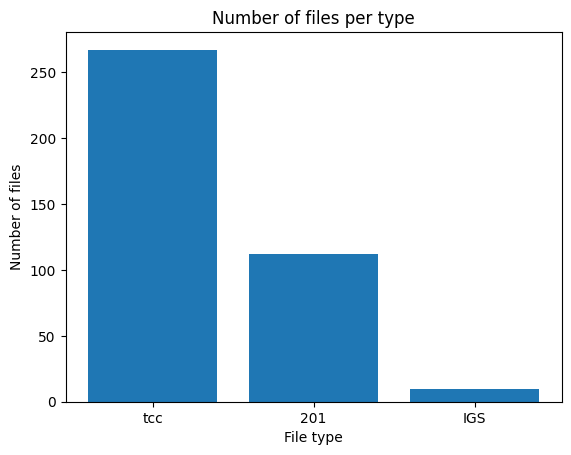

types: {'tcc': 267, '201': 112, 'IGS': 10}


In [5]:
import matplotlib.pyplot as plt

all_items = os.listdir(DIR_PATH)
directories = [process_inside_paths(item) for item in all_items if os.path.isdir(os.path.join(DIR_PATH, item))]

types = get_file_types(directories)

plt.bar(types.keys(), types.values())
plt.xlabel('File type')
plt.ylabel('Number of files')
plt.title('Number of files per type')
plt.show()
print('types:', types)


In [6]:
import tgt
import textgrid

def get_textgrid_duration_tgt(path):
    try:
        grid = tgt.read_textgrid(path)
        return 200, grid.end_time
    except Exception as e:
        print(f"An unexpected error occurred: {e} in {path}")
        return 400, 0.0

def get_textgrid_duration_textgrid(path):
    try:
        tg = textgrid.TextGrid.fromFile(path)
        return 200, tg.maxTime
    except Exception as e:
        print(f"[textgrid WARN] {path}: {e}")
        return 400, 0.0
        
def get_summed_durations(dirs, types, type):
    durations = dict.fromkeys(types, 0)
    errors = 0
    for dir in dirs:
        files = [file for file in os.listdir(dir) if os.path.isfile(os.path.join(dir, file))]
        mp3s = {file[:-4] for file in files if file[-4:] == '.mp3'}
        textGrids = {file[:-9] for file in files if file[-9:] == '.TextGrid'}
        pairs = mp3s.intersection(textGrids)

        for file in pairs:
            file_path = os.path.join(dir, file + '.TextGrid')
            if type == 'tgt':
                code, duration = get_textgrid_duration_tgt(file_path)
            else:
                code, duration = get_textgrid_duration_textgrid(file_path)
                
            if code == 200:
                durations[file[:3]] += duration
            else:
                errors += 1

    return durations, errors

An unexpected error occurred: list index out of range in ../../data/6_11_2025/Tonal case 9/tcc_dato1239_tsim1256_IGS0229_2016-2-28_GG2.TextGrid
An unexpected error occurred: list index out of range in ../../data/6_11_2025/Verbal inflections and tonal case 2/tcc_dato1239_tsim1256_IGS0229_2016-2-2_GG2_1.TextGrid
An unexpected error occurred: list index out of range in ../../data/6_11_2025/Verb root categories/tcc_dato1239_tsim1256_IGS0229_2015-12-30_GG2.TextGrid
An unexpected error occurred: list index out of range in ../../data/6_11_2025/Phonology and verbs/tcc_dato1239_tsim1256_IGS0229_2015-12-23_YN.TextGrid
An unexpected error occurred: list index out of range in ../../data/6_11_2025/Tonal case 1/tcc_dato1239_tsim1256_IGS0229_2016-2-17_YM_2.TextGrid
An unexpected error occurred: list index out of range in ../../data/6_11_2025/Words for physical actions 1/2015-5-27_IGS0229_RG_EB_Session_1_.TextGrid
An unexpected error occurred: list index out of range in ../../data/6_11_2025/Words for 

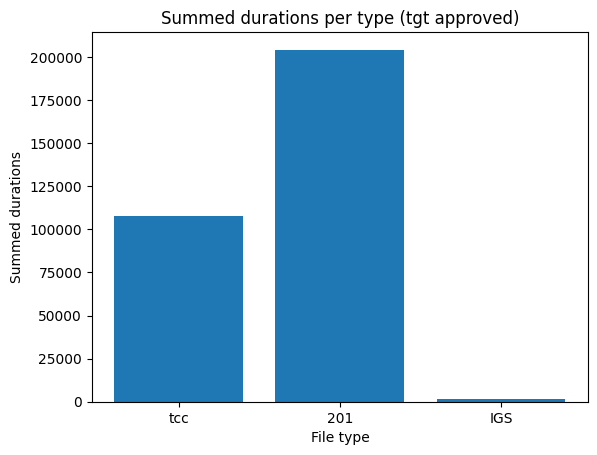

types: {'tcc': 267, '201': 112, 'IGS': 10}


In [7]:
durations, errors = get_summed_durations(directories, types, 'tgt')
print('ERRORS', errors)

plt.bar(durations.keys(), durations.values())
plt.xlabel('File type')
plt.ylabel('Summed durations')
plt.title('Summed durations per type (tgt approved)')
plt.show()
print('types:', types)

ERRORS 0


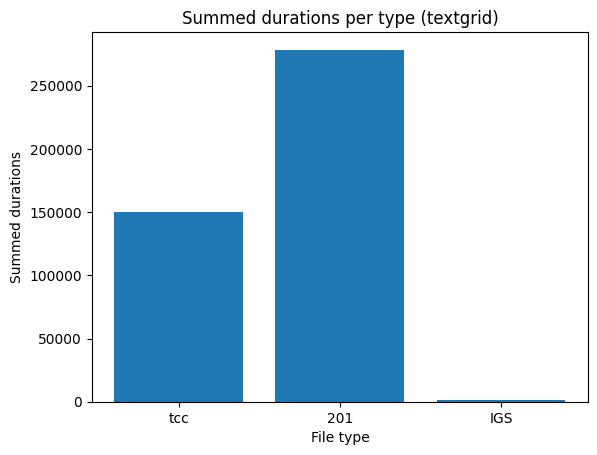

In [8]:
durations, errors = get_summed_durations(directories, types, 'textgrid')
print('ERRORS', errors)

plt.bar(durations.keys(), durations.values())
plt.xlabel('File type')
plt.ylabel('Summed durations')
plt.title('Summed durations per type (textgrid)')
plt.show()

In [9]:
import textgrid

def get_tiers(path):
    try:
        tg = textgrid.TextGrid.fromFile(path)
        tier_names = [tier.name for tier in tg.tiers]
        return 200, tier_names
    except Exception as e:
        print(f"[textgrid WARN] {path}: {e}")
        return 400, 0.0
        
def get_tier_names(dirs, types):
    tier_names_by_type = {t: set() for t in types}
    errors = 0
    for dir in dirs:
        files = [file for file in os.listdir(dir) if os.path.isfile(os.path.join(dir, file))]
        mp3s = {file[:-4] for file in files if file[-4:] == '.mp3'}
        textGrids = {file[:-9] for file in files if file[-9:] == '.TextGrid'}
        pairs = mp3s.intersection(textGrids)

        for file in pairs:
            file_path = os.path.join(dir, file + '.TextGrid')
 
            code, tiers = get_tiers(file_path)
                
            if code == 200:
                tier_names_by_type[file[:3]].update(tiers)
            else:
                errors += 1
    
    return tier_names_by_type, errors

In [10]:
tiers_dict, errors = get_tier_names(directories, types)
print(tiers_dict)
for type, tiers in tiers_dict.items():
    print('TYPE: ', type)
    print('unique tiers:', tiers)

{'tcc': {'IPA', 'Swahili', 'Asmjeeg', 'English'}, '201': {'ref@KM', 'ref@EB', 'ref', 'ref@RM', 'ref@YM', 'ref@BD'}, 'IGS': {'FT-ENG', 'REF', 'FT-SWA', 'Transcription'}}
TYPE:  tcc
unique tiers: {'IPA', 'Swahili', 'Asmjeeg', 'English'}
TYPE:  201
unique tiers: {'ref@KM', 'ref@EB', 'ref', 'ref@RM', 'ref@YM', 'ref@BD'}
TYPE:  IGS
unique tiers: {'FT-ENG', 'REF', 'FT-SWA', 'Transcription'}


In [11]:
import re

transcription_tiers_map = {
    "tcc": r"^Asmjeeg$",
    "201": r"^ref",
    "IGS": r"Transcription"
}

def get_tiers_duration(path, file_type):
    tier_name = transcription_tiers_map[file_type]

    try:
        tg = textgrid.TextGrid.fromFile(path)
        duration = 0
        for tier in tg.tiers:
            if not re.search(tier_name, tier.name, re.IGNORECASE):
                continue
            
            if isinstance(tier, textgrid.IntervalTier):
                for interval in tier:
                    if interval.mark.strip():
                        duration += (interval.maxTime - interval.minTime)   

        return 200, duration
    except Exception as e:
        print(f"[textgrid WARN] {path}: {e}")
        return 400, 0.0

def get_non_silent_durations(dirs, types):
    durations = dict.fromkeys(types, 0)
    errors = 0
    for dir in dirs:
        files = [file for file in os.listdir(dir) if os.path.isfile(os.path.join(dir, file))]
        mp3s = {file[:-4] for file in files if file[-4:] == '.mp3'}
        textGrids = {file[:-9] for file in files if file[-9:] == '.TextGrid'}
        pairs = mp3s.intersection(textGrids)

        for file in pairs:
            file_path = os.path.join(dir, file + '.TextGrid')
            code, duration = get_tiers_duration(file_path, file[:3])
                
            if code == 200:
                durations[file[:3]] += duration
            else:
                errors += 1

    return durations, errors

ERRORS 0


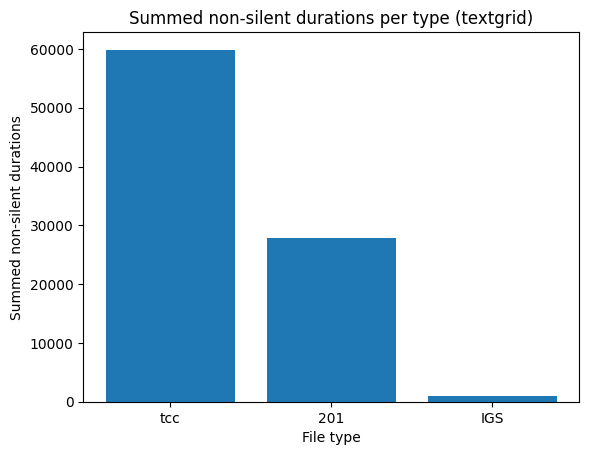

In [12]:
durations, errors = get_non_silent_durations(directories, types)
print('ERRORS', errors)

plt.bar(durations.keys(), durations.values())
plt.xlabel('File type')
plt.ylabel('Summed non-silent durations')
plt.title('Summed non-silent durations per type (textgrid)')
plt.show()

In [1]:
60000/3600

16.666666666666668